WIE2003 Introduction to Data Science

Group Assignment

---

Group Members:
1. See Chan Sing (23004971)
2. Soon Ming Hong (23004950)
3. Tham Jing Qin (23004988)
4. Eng Ke Jia (22089176)
5. Lim Jian Chuen (23005005)
6. Ong Han Lin (23004928)


# **The Study-Sleep-Stress Triangle: A Data-Driven Look at Academic Life**
---


About Dataset

---

Our dataset provides a detailed view of student lifestyle patterns and their correlation with academic performance, represented by GPA. It contains 2,000 records of students' daily habits across study, extracurriculars, sleep, socializing, and physical activities. Each student's stress level is derived based on study and sleep hours, offering insights into how lifestyle factors may impact academic outcomes.

💡 OSEMN Framework Overview

---

This project follows the OSEMN data science process, which includes the following stages:

1. Obtain – We collected data from a real-world dataset containing 2,000 records of student lifestyle habits, including study hours, sleep hours, GPA, and stress levels.

2. Scrub – Data cleaning was performed to check for missing values, remove duplicates, encode categorical variables (e.g., stress levels), and prepare the data for analysis.

3. Explore – We used descriptive statistics, visualizations (bar charts, histograms, scatter plots, heatmaps, radar chart), and correlation analysis to uncover patterns and trends between lifestyle habits and stress levels.

4. Model – A predictive classification model was developed to estimate student stress levels based on study hours, sleep hours, and GPA. Class imbalance was addressed using SMOTE, and models were evaluated using precision, recall, F1-score, and confusion matrix.

5. Interpret – The results were interpreted to provide meaningful, data-driven insights and recommendations for improving student well-being and academic performance.

# **1. Obtain**

---

We collected data from a real-world dataset containing 2,000 records of student lifestyle habits, including study hours, sleep hours, GPA, and stress levels.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the uploaded file from Colab.
from google.colab import files

# Read the file.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student_lifestyle_dataset.csv")

In [4]:
# Descriptive statistics.
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


# **2. Scrub**

---

Data cleaning was performed to check for missing values, remove duplicates, encode categorical variables (e.g., stress levels), and prepare the data for analysis.

In [5]:
# View the basic information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [6]:
1# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of duplicate rows:", len(duplicate_rows))

# Optionally, remove duplicate rows (if needed)
# df.drop_duplicates(inplace=True)


Duplicate Rows:
Empty DataFrame
Columns: [Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, GPA, Stress_Level]
Index: []
Number of duplicate rows: 0


In [7]:
# Encode Stress_Level: Low = 1, Moderate = 2, High = 3
stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Stress_Level_Encoded'] = df['Stress_Level'].map(stress_mapping)

#**3. Explore**

---

We used descriptive statistics, visualizations (bar charts, histograms, scatter plots, heatmaps, radar chart), and correlation analysis to uncover patterns and trends between lifestyle habits and stress levels.

**Research Question**

---

What is the relationship between students' study hours, sleep hours, GPA, and their stress levels?


**Dataset Overview**


---

This dataset contains 2,000 student records collected via a Google Form survey. It includes key lifestyle and academic indicators such as:

- Study hours

- Sleep hours

- Stress level (categorized: Low, Moderate, High)

- GPA (academic performance)

- Socializing and physical activity hours

The dataset enables analysis of how these lifestyle factors influence student well-being and academic performance, aligning with **SDG 4 – Quality Education.**

**Source**


---

https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset/data

**Limitations**

---

- Sample bias: Data is limited to university students, which may affect generalizability to other populations.
- Factors such as diet, financial pressure, and part-time work were not included due to dataset constraints and scope limitations.

**Summarize Key Data with Descriptive Statistics**


---


- Present summary statistics (mean, median, variance, etc.) visually using bar
charts, pie charts, or histograms.
- Highlight any interesting patterns or trends we observe in the data.

In [8]:
numeric_df = df.select_dtypes(include=['number'])

# Custom descriptive statistics, including quantiles.
descriptive_stats = pd.DataFrame({
    'count': numeric_df.count(),
    'mean': numeric_df.mean().round(3),
    'mode': numeric_df.mode().iloc[0].round(3), # Take the first mode if there are multiple
    'min': numeric_df.min().round(3),
    '25%': numeric_df.quantile(0.25).round(3),
    'median': numeric_df.median().round(3),
    '75%': numeric_df.quantile(0.75).round(3),
    'max': numeric_df.max().round(3),
    'var': numeric_df.var().round(3), # Variance
    'std': numeric_df.std().round(3) # Standard Deviation
})

# Display results.
print(descriptive_stats)

                                 count      mean  mode   min     25%   median  \
Student_ID                        2000  1000.500  1.00  1.00  500.75  1000.50   
Study_Hours_Per_Day               2000     7.476  6.30  5.00    6.30     7.40   
Extracurricular_Hours_Per_Day     2000     1.990  1.60  0.00    1.00     2.00   
Sleep_Hours_Per_Day               2000     7.501  5.40  5.00    6.20     7.50   
Social_Hours_Per_Day              2000     2.705  0.30  0.00    1.20     2.60   
Physical_Activity_Hours_Per_Day   2000     4.328  4.30  0.00    2.40     4.10   
GPA                               2000     3.116  3.11  2.24    2.90     3.11   
Stress_Level_Encoded              2000     2.366  3.00  1.00    2.00     3.00   

                                     75%     max         var      std  
Student_ID                       1500.25  2000.0  333500.000  577.495  
Study_Hours_Per_Day                 8.70    10.0       2.027    1.424  
Extracurricular_Hours_Per_Day       3.00     4.0      

### **Interesting patterns or trends (Key Variables) we observe in the data.**


---



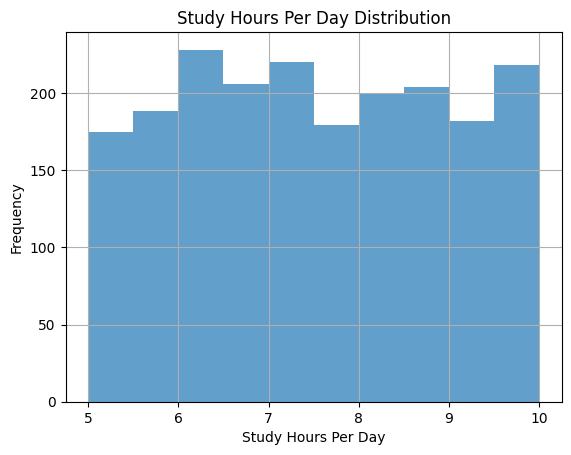

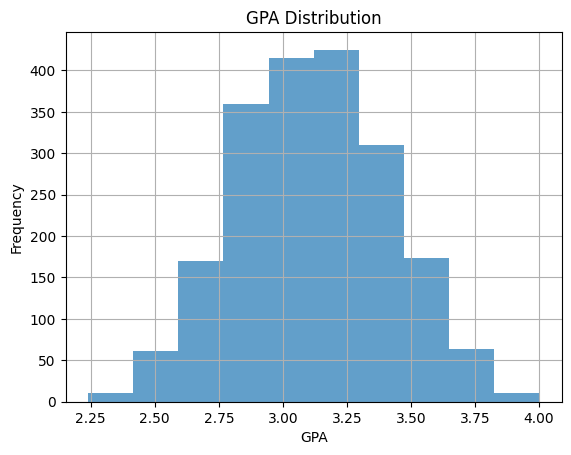

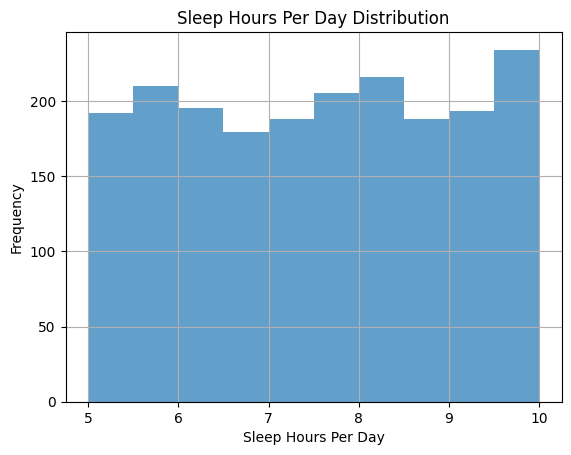

In [9]:
# Study_Hours_Per_Day distribution.
df['Study_Hours_Per_Day'].hist(bins=10, alpha=0.7)
plt.title('Study Hours Per Day Distribution')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Frequency')
plt.show()

# GPA distribution.
df['GPA'].hist(bins=10, alpha=0.7)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# Sleep_Hours_Per_day Distribution
df['Sleep_Hours_Per_Day'].hist(bins=10, alpha=0.7)
plt.title('Sleep Hours Per Day Distribution')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Frequency')
plt.show()


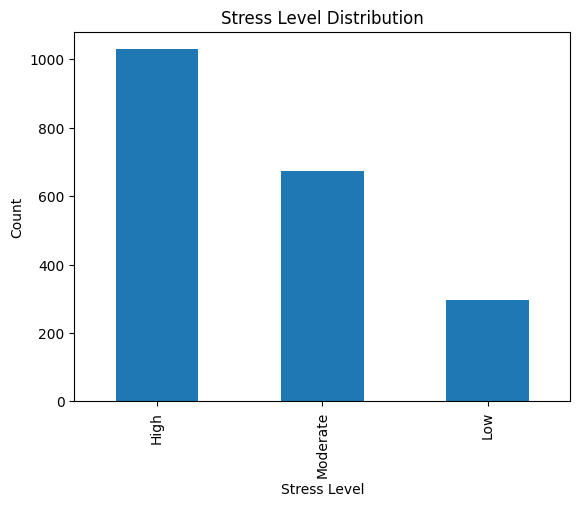

In [10]:
# Stress_Level Distribution
df['Stress_Level'].value_counts().plot(kind = 'bar')
plt.title('Stress Level Distribution')
plt.xlabel("Stress Level")
plt.ylabel('Count')
plt.show()

### **Visual Summary Statistics of the Key Variables**


---



        Study_Hours_Per_Day       GPA  Sleep_Hours_Per_Day
mean               7.475800  3.115960             7.501250
median             7.400000  3.110000             7.500000
var                2.027458  0.089206             2.134371
std                1.423888  0.298674             1.460949


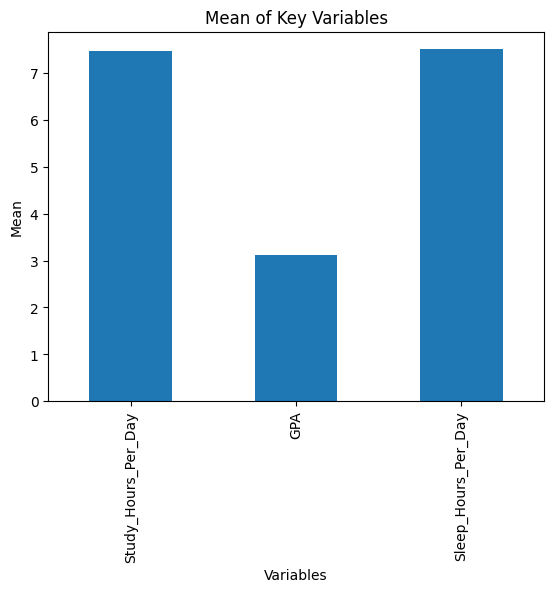

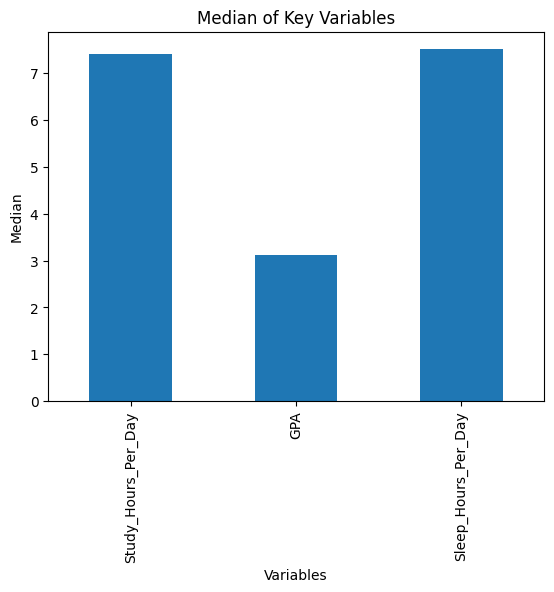

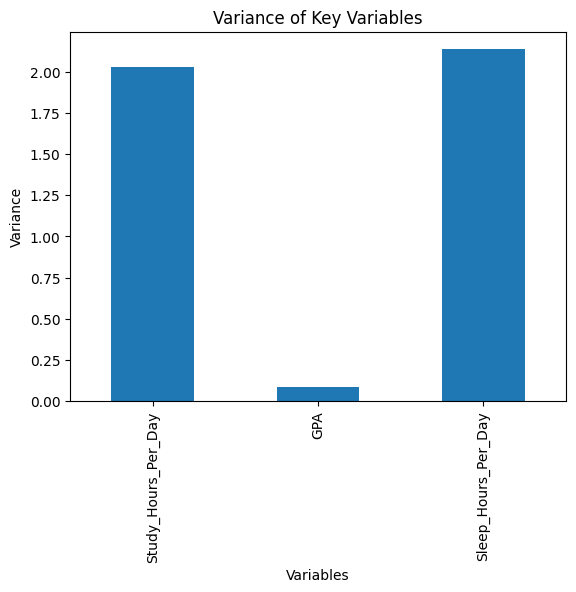

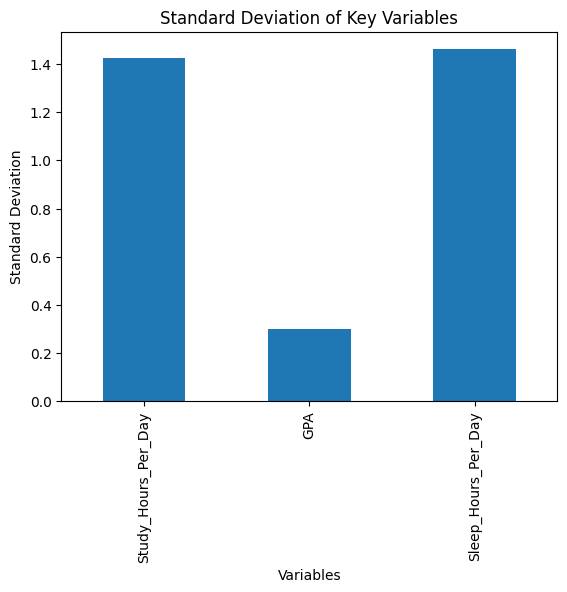

In [11]:
# Calculate descriptive statistics for key numerical variables.
descriptive_stats = df[['Study_Hours_Per_Day','GPA','Sleep_Hours_Per_Day']].agg(['mean','median','var','std'])

# Print descriptive statistics.
print(descriptive_stats)

# Use a bar chart to show the mean.
descriptive_stats.loc['mean'].plot(kind='bar', title="Mean of Key Variables")
plt.xlabel('Variables')
plt.ylabel('Mean')
plt.show()

# Use a bar chart to show the median.
descriptive_stats.loc['median'].plot(kind='bar', title="Median of Key Variables")
plt.xlabel('Variables')
plt.ylabel('Median')
plt.show()

# Use a bar chart to show the variance.
descriptive_stats.loc['var'].plot(kind='bar', title="Variance of Key Variables")
plt.xlabel('Variables')
plt.ylabel('Variance')
plt.show()

# # Use a bar chart to show the standard deviation.
descriptive_stats.loc['std'].plot(kind='bar', title="Standard Deviation of Key Variables")
plt.xlabel('Variables')
plt.ylabel('Standard Deviation')
plt.show()



### **Conduct a Probability Analysis**


---

- Calculate and visualize the probability of a key outcome (e.g., probability of
customer satisfaction above a certain threshold, or probability of achieving a top
score).
- Explain the significance of these probabilities in relation to our research
question.

### **Probability of Stress Levels**



---



Probability of Stress Levels:
Stress_Level
High        0.5145
Moderate    0.3370
Low         0.1485
Name: proportion, dtype: float64


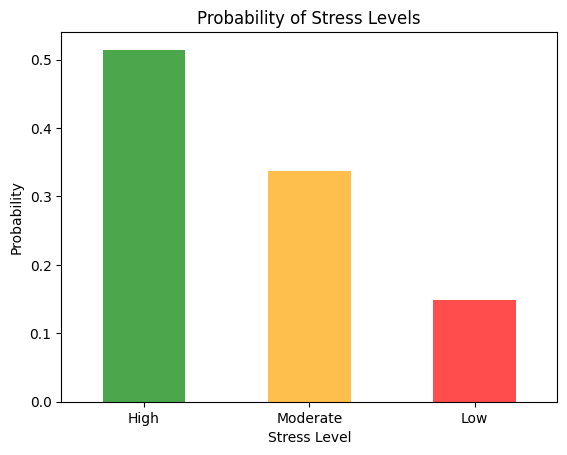

In [12]:
# Calculate the probability of each stress level
stress_level_prob = df['Stress_Level'].value_counts(normalize=True)
print("Probability of Stress Levels:")
print(stress_level_prob)

# Visualize the probability of each stress level
stress_level_prob.plot(kind='bar', color=['green','orange','red'], alpha=0.7)
plt.title("Probability of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.show()


### **Categorization of Study and Sleep Hours**


---



In [26]:
# Define bins for conditional probability analysis
study_bins = [0, 2, 4, 6, 8, 10]
sleep_bins = [0, 4, 6, 8, 10, 12]

# Categorize Study_Hours_Per_Day and Sleep_Hours_Per_Day
df['Study_Category'] = pd.cut(df['Study_Hours_Per_Day'], bins=study_bins, labels=["Very Low", "Low", "Moderate", "High", "Very High"])
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Day'], bins=sleep_bins, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

# Verify the categorization
print(df[['Study_Hours_Per_Day', 'Study_Category', 'Sleep_Hours_Per_Day', 'Sleep_Category']].head())

   Study_Hours_Per_Day Study_Category  Sleep_Hours_Per_Day Sleep_Category
0                  6.9           High                  8.7           High
1                  5.3       Moderate                  8.0       Moderate
2                  5.1       Moderate                  9.2           High
3                  6.5           High                  7.2       Moderate
4                  8.1      Very High                  6.5       Moderate


### **Conditional Probability: High Stress Levels**


---



<ipython-input-14-06911518e26a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Study_Category', 'Sleep_Category'])['Stress_Level']


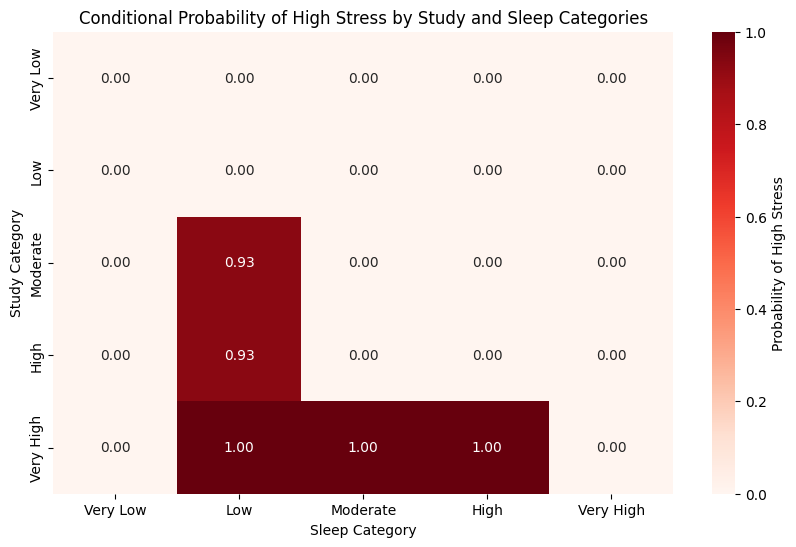

In [14]:
# Calculate conditional probability of high stress levels
conditional_stress_prob = (
    df.groupby(['Study_Category', 'Sleep_Category'])['Stress_Level']
    .value_counts(normalize=True)
    .unstack(fill_value=0)['High']
)

# Reshape the conditional_stress_prob to a 2D array
conditional_stress_prob = conditional_stress_prob.values.reshape(
    len(df['Study_Category'].cat.categories),
    len(df['Sleep_Category'].cat.categories)
)

# Visualize the conditional probability heatmap
plt.figure(figsize=(10, 6))
# The heatmap function expects labels for x and y ticks
# these need to be set to the categories used to create the grouping.
sns.heatmap(
    conditional_stress_prob,
    annot=True,
    cmap="Reds",
    fmt=".2f",
    cbar_kws={'label': 'Probability of High Stress'},
    xticklabels=df['Sleep_Category'].cat.categories,
    yticklabels=df['Study_Category'].cat.categories
)
plt.title("Conditional Probability of High Stress by Study and Sleep Categories")
plt.xlabel("Sleep Category")
plt.ylabel("Study Category")
plt.show()


### **Scatterplot: Study vs Sleep Hours**



---



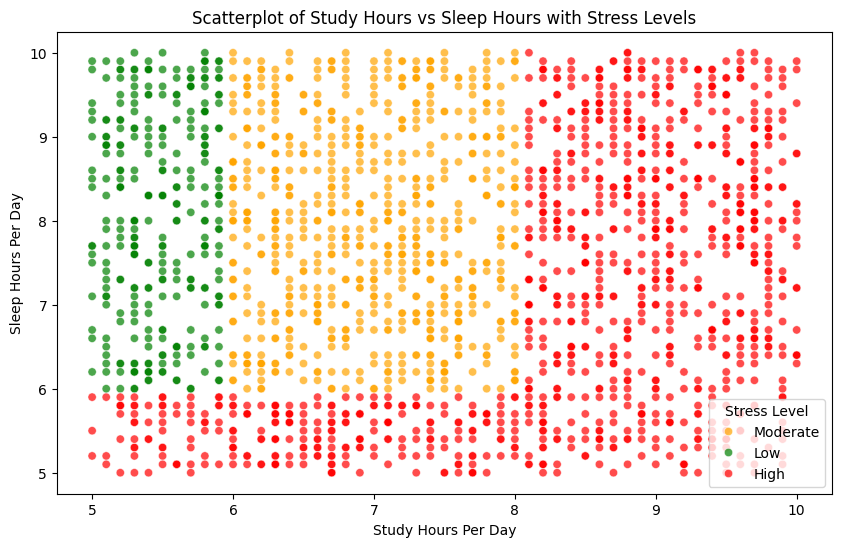

In [15]:
# Scatterplot of study hours and sleep hours with stress levels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Study_Hours_Per_Day",
    y="Sleep_Hours_Per_Day",
    hue="Stress_Level",
    palette={"Low": "green", "Moderate": "orange", "High": "red"},
    alpha=0.7
)
plt.title("Scatterplot of Study Hours vs Sleep Hours with Stress Levels")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Sleep Hours Per Day")
plt.legend(title="Stress Level")
plt.show()


### **Pairplot: Relationship Exploration**


---



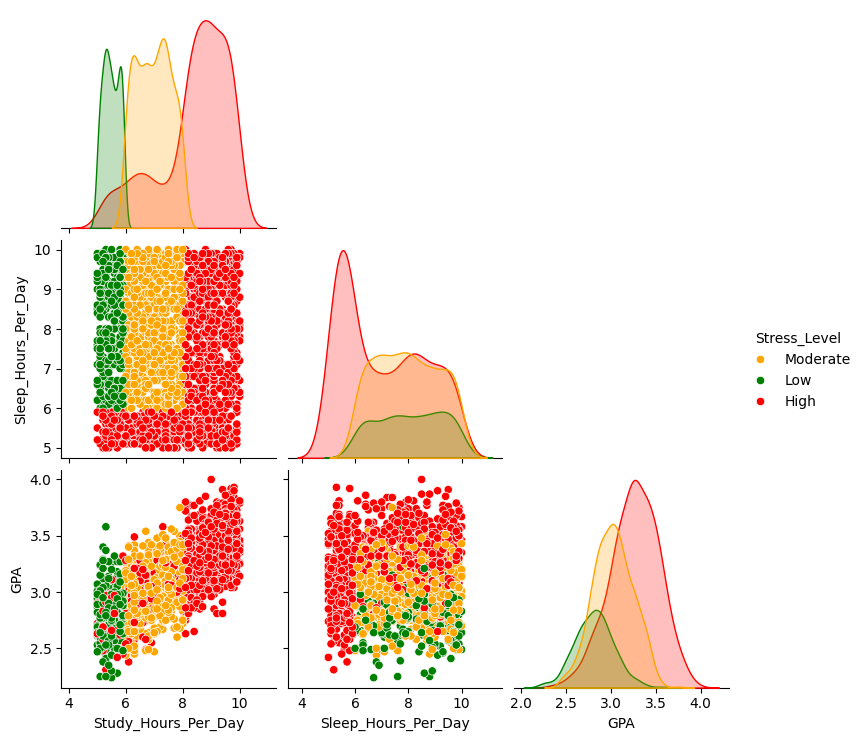

In [16]:
# Pairplot for study hours, sleep hours, and GPA by stress level
sns.pairplot(
    df,
    vars=["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "GPA"],
    hue="Stress_Level",
    palette={"Low": "green", "Moderate": "orange", "High": "red"},
    corner=True
)
plt.show()

### **Correlation Analysis**


---



Correlation Matrix:
                      Study_Hours_Per_Day  Sleep_Hours_Per_Day  \
Study_Hours_Per_Day              1.000000             0.026717   
Sleep_Hours_Per_Day              0.026717             1.000000   
Stress_Level_Numeric             0.738843            -0.298917   

                      Stress_Level_Numeric  
Study_Hours_Per_Day               0.738843  
Sleep_Hours_Per_Day              -0.298917  
Stress_Level_Numeric              1.000000  


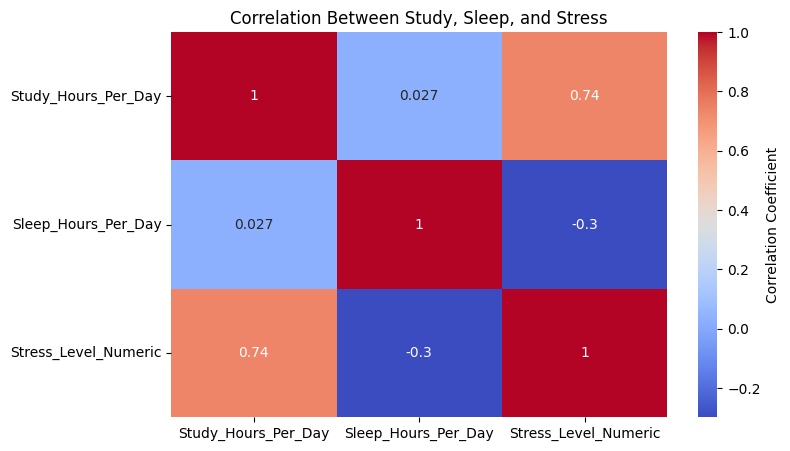

In [17]:
# Add a numeric column for Stress_Level for correlation analysis
stress_mapping = {"Low": 1, "Moderate": 2, "High": 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Compute correlation matrix
correlation_matrix = df[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "Stress_Level_Numeric"]].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Between Study, Sleep, and Stress")
plt.show()

### **Perform Hypothesis Testing**


---

- State and test a hypothesis related to your research question (e.g., “Is there a
significant difference in behavior between two groups?”).
- Show your results visually (e.g., p-values, confidence intervals) and briefly
summarize your findings.

Hypothesis 1: Study Hours and Stress Levels
：Is there a significant difference in study hours among students with different stress levels (Low, Moderate, High)?

---


- Null Hypothesis (H₀): There is no significant difference in study hours among students with different stress levels (Low, Moderate, High).

- Alternative Hypothesis (Hₐ): There is a significant difference in study hours among students with different stress levels.


Hypothesis 2: Sleep Hours and Stress Levels
：Is there a significant difference in sleep hours among students with different stress levels (Low, Moderate, High)?

---


- Null Hypothesis (H₀): There is no significant difference in sleep hours among students with different stress levels (Low, Moderate, High).

- Alternative Hypothesis (Hₐ): There is a significant difference in sleep hours among students with different stress levels.

Hypothesis 3: GPA and Stress Levels
：Is there a significant difference in GPA among students with different stress levels (Low, Moderate, High)?

---


- Null Hypothesis (H₀): There is no significant difference in GPA among students with different stress levels (Low, Moderate, High).

- Alternative Hypothesis (Hₐ): There is a significant difference in GPA among students with different stress levels.


### **Perform a one-way ANOVA**


---


Hypothesis 1: Study Hours and Stress Levels

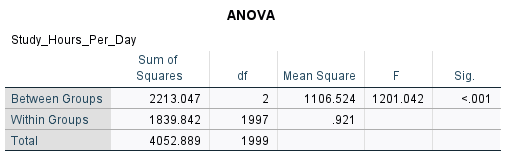

Statistical Results:

**F = 1201.042, p-value < 0.001.**

Conclusion: Since p < 0.05, the null hypothesis is rejected. There is a significant difference in study hours among the different stress level groups.


---








Hypothesis 2: Sleep Hours and Stress Levels

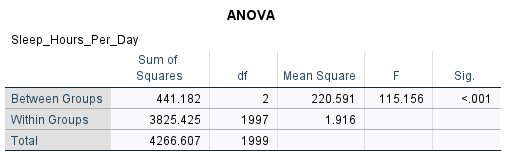


Statistical Results:

**F = 115.156, p-value < 0.001**

Conclusion: Since p < 0.05, the null hypothesis is rejected. There is a significant difference in sleep hours among the different stress level groups.



---



Hypothesis 3: GPA and Stress Levels

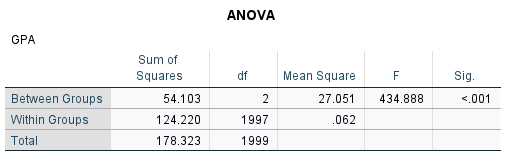



Statistical Results:

**F = 434.888, p-value < 0.001.**

Conclusion: Since p < 0.05, the null hypothesis is rejected. There is a significant difference in GPA among the different stress level groups.




### **Tukey HSD Post-Hoc Test Results Analysis**


---
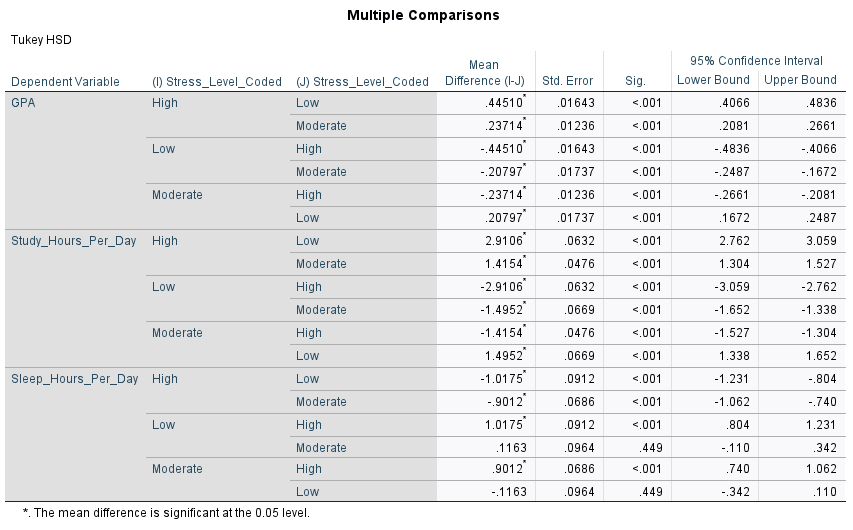






**1.  Study Hours Per Day and Stress Levels**

**High vs Low**: Mean Difference = 2.911, p < 0.001

Students with High stress levels study significantly more hours than those with Low stress levels.

**High vs Moderate**: Mean Difference = 1.415, p < 0.001

Students with High stress levels study significantly more hours than those with Moderate stress levels.

**Moderate vs Low**: Mean Difference = 1.495, p < 0.001

Students with Moderate stress levels study significantly more than those with Low stress levels





**2.   Sleep Hours Per Day and Stress Levels**

**High vs Low**: Mean Difference = -1.017, p < 0.001

Students with High stress levels sleep significantly fewer hours than those with Low stress levels.

**Moderate vs Low**: Mean Difference = -0.116, p = 0.449 (not significant).

No significant difference in sleep hours between Moderate stress and Low stress students.

**High vs Moderate**: Mean Difference = -0.902, p < 0.001

Students with High stress levels sleep significantly fewer hours than those with Moderate stress levels.






**3.  GPA and Stress Levels**

**High vs Low**: Mean Difference = 0.445, p < 0.001

Students with High stress levels have significantly higher GPAs than those with Low stress levels.

**High vs Moderate**: Mean Difference = 0.237, p < 0.001

Students with High stress levels have significantly higher GPAs than those with Moderate stress levels.

**Moderate vs Low**: Mean Difference = 0.208, p < 0.001

Moderate stress students have significantly higher GPAs than Low stress students.






### **Analyze Relationships Through Correlation or Regression**


---

- Create a scatter plot or similar graphic to illustrate any relationship between two
key variables, including correlation coefficients or trend lines where relevant.
- Interpret the strength and direction of the relationship in context.

**Step 1: Correlation Analysis**

We’ll calculate the correlation matrix to identify the strength and direction of relationships between:

* Study Hours
* Sleep Hours
* GPA
* Stress Levels (numerically mapped)

Correlation Matrix:
                      Study_Hours_Per_Day  Sleep_Hours_Per_Day       GPA  \
Study_Hours_Per_Day              1.000000             0.026717  0.734468   
Sleep_Hours_Per_Day              0.026717             1.000000 -0.004278   
GPA                              0.734468            -0.004278  1.000000   
Stress_Level_Numeric             0.738843            -0.298917  0.550395   

                      Stress_Level_Numeric  
Study_Hours_Per_Day               0.738843  
Sleep_Hours_Per_Day              -0.298917  
GPA                               0.550395  
Stress_Level_Numeric              1.000000  


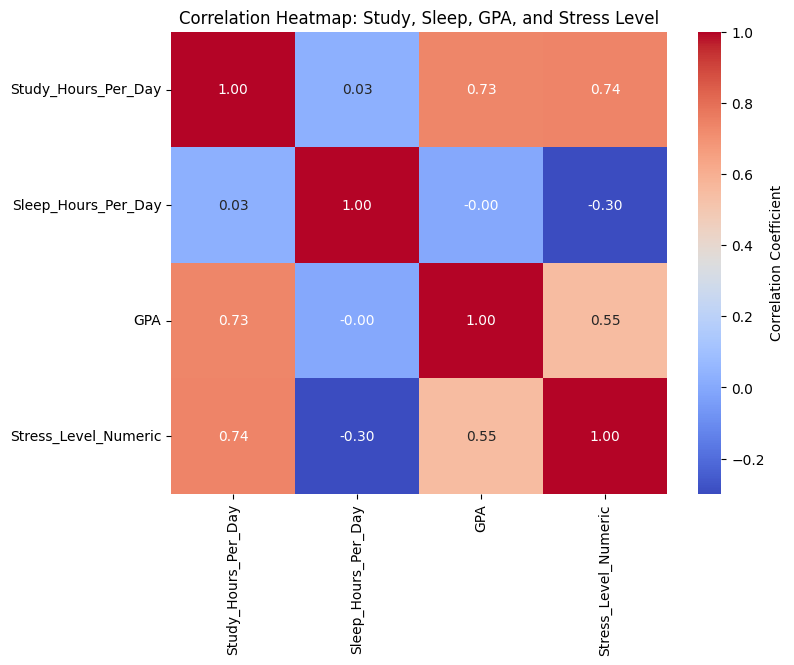

In [18]:
# Compute the correlation matrix for key variables
stress_mapping = {"Low": 1, "Moderate": 2, "High": 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Select relevant columns
correlation_data = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA', 'Stress_Level_Numeric']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap: Study, Sleep, GPA, and Stress Level")
plt.show()


**Step 2: Regression Analysis**

We’ll perform a regression analysis to explore how Study Hours and Sleep Hours predict Stress Levels (numerical).

In [19]:
import statsmodels.api as sm

# Define the dependent (target) variable and independent (predictor) variables
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']]  # Independent variables
y = df['Stress_Level_Numeric']  # Dependent variable

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Stress_Level_Numeric   R-squared:                       0.648
Model:                              OLS   Adj. R-squared:                  0.647
Method:                   Least Squares   F-statistic:                     1834.
Date:                  Sun, 25 May 2025   Prob (F-statistic):               0.00
Time:                          07:30:07   Log-Likelihood:                -1158.5
No. Observations:                  2000   AIC:                             2323.
Df Residuals:                      1997   BIC:                             2340.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

**Relationship Between Study Hours,Sleep Hours and GPA**

We'll visualize the relationships with scatter plots and regression lines.

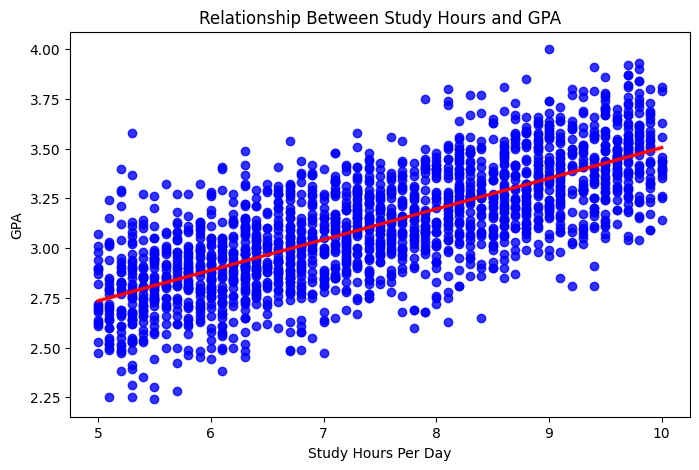

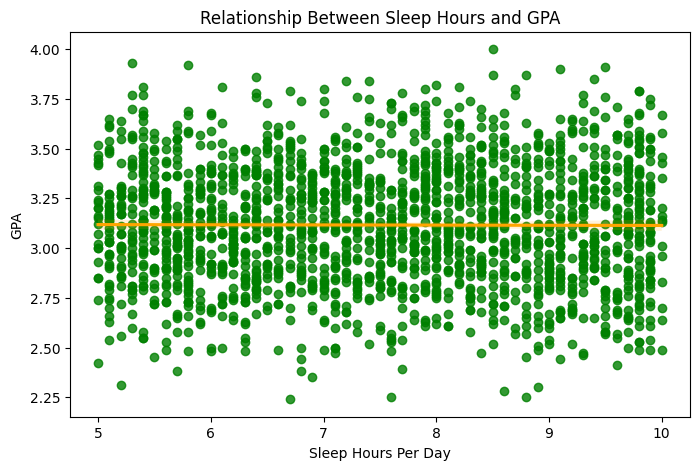

In [20]:
# Scatter plot: Study Hours vs GPA with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Study_Hours_Per_Day', y='GPA', data=df, color='blue', line_kws={'color': 'red'})
plt.title("Relationship Between Study Hours and GPA")
plt.xlabel("Study Hours Per Day")
plt.ylabel("GPA")
plt.show()

# Scatter plot: Sleep Hours vs GPA with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Sleep_Hours_Per_Day', y='GPA', data=df, color='green', line_kws={'color': 'orange'})
plt.title("Relationship Between Sleep Hours and GPA")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("GPA")
plt.show()


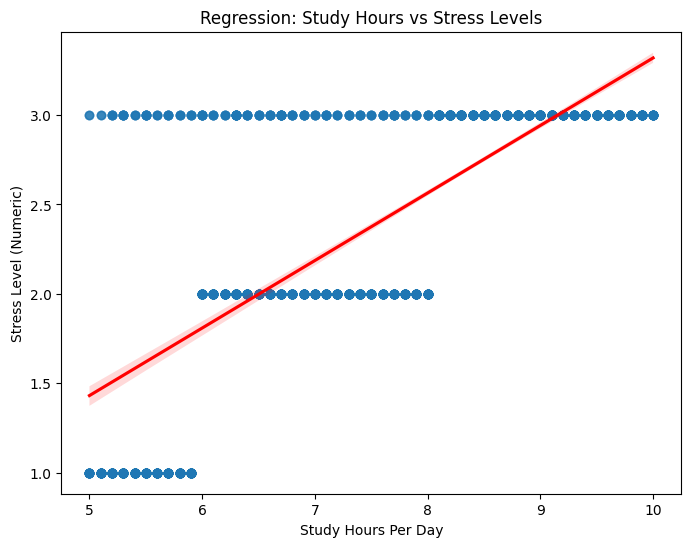

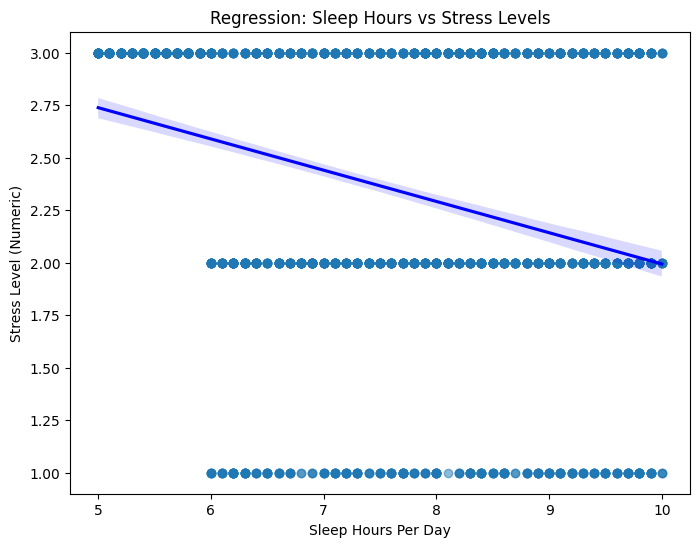

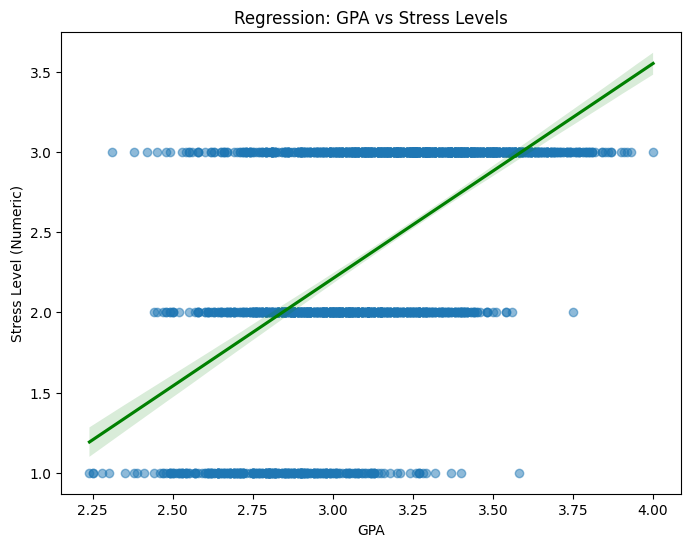

In [21]:
# Scatterplot: Study Hours vs Stress Levels
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Study_Hours_Per_Day', y='Stress_Level_Numeric', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Regression: Study Hours vs Stress Levels")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Stress Level (Numeric)")
plt.show()

# Scatterplot: Sleep Hours vs Stress Levels
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Sleep_Hours_Per_Day', y='Stress_Level_Numeric', scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.title("Regression: Sleep Hours vs Stress Levels")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("Stress Level (Numeric)")
plt.show()


# Scatterplot: GPA vs Stress Levels
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='GPA', y='Stress_Level_Numeric', scatter_kws={"alpha":0.5}, line_kws={"color":"green"})
plt.title("Regression: GPA vs Stress Levels")
plt.xlabel("GPA")
plt.ylabel("Stress Level (Numeric)")
plt.show()


In [22]:
# Correlation coefficients
cor_study = df['Stress_Level_Numeric'].corr(df['Study_Hours_Per_Day'])
cor_sleep = df['Stress_Level_Numeric'].corr(df['Sleep_Hours_Per_Day'])
cor_gpa = df['Stress_Level_Numeric'].corr(df['GPA'])

print(f"Correlation between Stress Levels and Study Hours: {cor_study:.2f}")
print(f"Correlation between Stress Levels and Sleep Hours: {cor_sleep:.2f}")
print(f"Correlation between Stress Levels and GPA: {cor_gpa:.2f}")

Correlation between Stress Levels and Study Hours: 0.74
Correlation between Stress Levels and Sleep Hours: -0.30
Correlation between Stress Levels and GPA: 0.55


### **Interpretation of Correlation and Regression Results**

#### 1. **Study Hours vs. Stress Levels**
- **Correlation Coefficient**: \( r = 0.74 \)
- **Direction**: Positive  
- **Strength**: Strong  
- **Interpretation**:  
   - The strong positive correlation indicates that **increasing the number of study hours per day is associated with higher stress levels**.  
   - The regression coefficient (\( \text{coef} = 0.3819 \)) confirms this: for each additional hour of study, the stress level increases by approximately **0.38 units**.  
   - The relationship is statistically significant (\( p < 0.001 \)).  
   - **Context**: Students who spend more hours studying may experience higher stress due to increased workload, pressure to perform, or reduced time for rest or relaxation.  

---

#### 2. **Sleep Hours vs. Stress Levels**
- **Correlation Coefficient**: \( r = -0.30 \)
- **Direction**: Negative  
- **Strength**: Weak to Moderate  
- **Interpretation**:  
   - The negative correlation suggests that **more sleep hours are associated with lower stress levels**.  
   - The regression coefficient (\( \text{coef} = -0.1588 \)) further confirms this: for each additional hour of sleep, stress levels decrease by approximately **0.16 units**.  
   - This relationship is statistically significant (\( p < 0.001 \)).  
   - **Context**: Adequate sleep may help students manage stress better, as sleep is essential for mental and physical recovery. However, the relationship is weaker compared to study hours, indicating other factors may also contribute to stress.

---

#### 3. **GPA vs. Stress Levels**
- **Correlation Coefficient**: \( r = 0.55 \)
- **Direction**: Positive  
- **Strength**: Moderate  
- **Interpretation**:  
   - A moderate positive correlation shows that **higher GPA is associated with higher stress levels**.   
   - While the relationship is not as strong as with study hours, it still indicates a meaningful connection.  
   - **Context**: Students with higher academic performance may experience more pressure to maintain their grades, contributing to stress.

---

### **Summary of Relationships:**
1. **Study Hours** have the **strongest positive impact** on stress levels (\( r = 0.74 \)), suggesting that longer study time directly increases stress.  
2. **Sleep Hours** are **negatively correlated** with stress levels (\( r = -0.30 \)), meaning better sleep can help reduce stress, though the relationship is weaker.  
3. **GPA** has a **moderate positive relationship** with stress (\( r = 0.55 \)), indicating that higher academic performance is linked to increased stress.  



# **4. Model**

---

A predictive classification model was developed to estimate student stress levels based on study hours, sleep hours, and GPA. Class imbalance was addressed using SMOTE, and models were evaluated using precision, recall, F1-score, and confusion matrix.

**Prepare the Features for Modeling**

In [35]:
features = ['Study_Category_Encoded', 'Sleep_Category_Encoded', 'GPA']
target = 'Stress_Level_Numeric'  # Assuming this is already encoded as 1, 2, 3

In [65]:
# This code encodes study and sleep categories into numeric values for machine learning processing.
from sklearn.preprocessing import LabelEncoder

# Define full label range
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

# Create and fit encoders using full label range
le_study = LabelEncoder()
le_study.fit(labels)
df['Study_Category_Encoded'] = le_study.transform(df['Study_Category'])

le_sleep = LabelEncoder()
le_sleep.fit(labels)
df['Sleep_Category_Encoded'] = le_sleep.transform(df['Sleep_Category'])

**Split the Data (with Stratification), 80/20**

In [66]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [67]:
# Check column existence before access
print(df.columns.tolist())

['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level', 'Stress_Level_Encoded', 'Study_Category', 'Sleep_Category', 'Stress_Level_Numeric', 'Study_Category_Encoded', 'Sleep_Category_Encoded']


**Apply SMOTE to the training data**

In [68]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [69]:
# Check Class Distribution Before and After
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({3: 823, 2: 539, 1: 238})
After SMOTE: Counter({3: 823, 2: 823, 1: 823})


### **Model 1: Random Forest Classifier**
---
Description:
Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and reduce overfitting. It handles both linear and non-linear relationships well and is robust to outliers and noisy data.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["Low", "Moderate", "High"]))

Confusion Matrix (Random Forest):
[[ 49   9   1]
 [  4 128   3]
 [  3   2 201]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

         Low       0.88      0.83      0.85        59
    Moderate       0.92      0.95      0.93       135
        High       0.98      0.98      0.98       206

    accuracy                           0.94       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.94      0.94      0.94       400



### **Model 2: Logistic Regression**
---
Description: Logistic Regression is a linear model used for classification tasks. In multiclass settings, it estimates the probability of each class using the softmax function. It's fast, interpretable, and performs well when classes are linearly separable.

In [71]:
# Multinomial Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Low", "Moderate", "High"]))

Confusion Matrix (Logistic Regression):
[[ 51   0   8]
 [  4 130   1]
 [ 21  41 144]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         Low       0.67      0.86      0.76        59
    Moderate       0.76      0.96      0.85       135
        High       0.94      0.70      0.80       206

    accuracy                           0.81       400
   macro avg       0.79      0.84      0.80       400
weighted avg       0.84      0.81      0.81       400



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### **Model 3: K-Nearest Neighbors (KNN)**
---
Description: K-Nearest Neighbors is a simple, instance-based learning algorithm. It classifies a data point based on the majority label of its k nearest neighbors in the feature space. It doesn't learn a model during training but makes predictions during testing (lazy learner).

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=["Low", "Moderate", "High"]))

Confusion Matrix (KNN):
[[ 57   1   1]
 [  5 126   4]
 [  0   3 203]]

Classification Report (KNN):
              precision    recall  f1-score   support

         Low       0.92      0.97      0.94        59
    Moderate       0.97      0.93      0.95       135
        High       0.98      0.99      0.98       206

    accuracy                           0.96       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



### **Model 4: XGBoost Classifier**
---
Description: XGBoost (Extreme Gradient Boosting) is a high-performance boosting algorithm that handles complex non-linear relationships very well. It combines multiple weak learners (typically decision trees) to improve overall accuracy. XGBoost is known for its excellent performance in both competitions and real-world applications, and it is also robust to imbalanced data.

In [73]:
# Installs the XGBoost package needed for training the XGBoost classifier.
!pip install xgboost

In [74]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Adjust target values for XGBoost (classes must start from 0)
y_train_resampled_xgb = y_train_resampled - 1
y_test_xgb = y_test - 1

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled_xgb)

# Predict on the original test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test_xgb, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test_xgb, y_pred_xgb, target_names=["Low", "Moderate", "High"]))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
[[ 50   8   1]
 [  5 127   3]
 [  1   3 202]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

         Low       0.89      0.85      0.87        59
    Moderate       0.92      0.94      0.93       135
        High       0.98      0.98      0.98       206

    accuracy                           0.95       400
   macro avg       0.93      0.92      0.93       400
weighted avg       0.95      0.95      0.95       400



### **Model 5: Support Vector Machine (SVM)**
---
Description: Support Vector Machine (SVM) is a powerful classification algorithm that finds the optimal hyperplane to separate different classes. It performs well in high-dimensional spaces and can model non-linear boundaries using kernel tricks.

In [75]:
# SVM with RBF (Radial Basis Function) Kernel
# The RBF kernel helps the SVM model draw curved or complex decision boundaries, instead of just straight lines.
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Predict on the original test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Low", "Moderate", "High"]))

Confusion Matrix (SVM):
[[ 58   0   1]
 [  5 126   4]
 [  0   0 206]]

Classification Report (SVM):
              precision    recall  f1-score   support

         Low       0.92      0.98      0.95        59
    Moderate       1.00      0.93      0.97       135
        High       0.98      1.00      0.99       206

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



### **Table of Summary**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create performance summary
data = {
    "Model": [
        "Random Forest",
        "Logistic Regression",
        "K-Nearest Neighbors",
        "XGBoost Classifier",
        "SVM (RBF Kernel)"
    ],
    "Accuracy": [0.94, 0.82, 0.97, 0.95, 0.97],
    "Macro F1-Score": [0.92, 0.82, 0.96, 0.93, 0.97],
    "F1 (Low)": [0.85, 0.79, 0.94, 0.87, 0.95],
    "F1 (Moderate)": [0.93, 0.85, 0.95, 0.93, 0.97],
    "F1 (High)": [0.98, 0.82, 0.98, 0.98, 0.99]
}

# Convert to DataFrame
summary_df = pd.DataFrame(data)

# Display in table format
import pandas.io.formats.style
styled_table = summary_df.style.highlight_max(color='lightgreen', axis=0)
styled_table.format(precision=2)
styled_table

,Model,Accuracy,Macro F1-Score,F1 (Low),F1 (Moderate),F1 (High)
0,Random Forest,0.94,0.92,0.85,0.93,0.98
1,Logistic Regression,0.82,0.82,0.79,0.85,0.82
2,K-Nearest Neighbors,0.97,0.96,0.94,0.95,0.98
3,XGBoost Classifier,0.95,0.93,0.87,0.93,0.98
4,SVM (RBF Kernel),0.97,0.97,0.95,0.97,0.99


### **Conclusion: Best Performing Model - Support Vector Machine (SVM) with RBF kernel**
---
Based on the evaluation across five machine learning models, the **Support Vector Machine (SVM) with RBF kernel** achieved the **highest accuracy (0.97)** and **macro F1-score (0.97)**. It also demonstrated excellent precision and recall across all stress level categories, including the underrepresented "Low" class.

✅ **Therefore, SVM with RBF kernel is selected as the final model** for our data product to predict student stress levels based on study hours, sleep duration, and GPA.

# **5. Interpret**

---

The results were interpreted to develop a practical, data-driven solution that supports student well-being and academic success. By analyzing the relationship between study hours, sleep duration, GPA, and stress levels, we created a predictive tool that provides students with personalized stress-level feedback and actionable recommendations.

### **5.1 Data Product Deployment**

In [77]:
# Save the Trained Model and Preprocessing Files in Colab
import joblib

# Save SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save LabelEncoders
joblib.dump(le_study, 'le_study.pkl')
joblib.dump(le_sleep, 'le_sleep.pkl')

['le_sleep.pkl']

In [78]:
# Download the files
from google.colab import files

files.download('svm_model.pkl')
files.download('scaler.pkl')
files.download('le_study.pkl')
files.download('le_sleep.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# Create requirements.txt in Colab
with open("requirements.txt", "w") as f:
    f.write("streamlit\nscikit-learn\npandas\nnumpy\njoblib")
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Create streamlit_app.py file
with open("streamlit_app.py", "w") as f:
    f.write("""
import streamlit as st
import numpy as np
import joblib
import pandas as pd

# Load model and preprocessing objects
svm_model = joblib.load("svm_model.pkl")
scaler = joblib.load("scaler.pkl")
le_study = joblib.load("le_study.pkl")
le_sleep = joblib.load("le_sleep.pkl")

# Define bin edges and labels for study and sleep
study_bins = [0, 2, 4, 6, 8, 10]
sleep_bins = [0, 4, 6, 8, 10, 12]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

st.set_page_config(page_title="Student Stress Predictor", page_icon="📊")
st.title("📘 Student Stress Level Predictor")
st.write("Enter your daily habits to predict your likely stress level.")

# Input widgets
study_hours = st.slider("Study Hours Per Day", 0.0, 10.0, step=0.5)
sleep_hours = st.slider("Sleep Hours Per Day", 0.0, 12.0, step=0.5)
gpa = st.slider("GPA", 0.0, 4.0, step=0.01)

if st.button("Predict Stress Level"):
    # Bin inputs
    study_cat = pd.cut([study_hours], bins=study_bins, labels=labels)[0]
    sleep_cat = pd.cut([sleep_hours], bins=sleep_bins, labels=labels)[0]

    # Encode categories
    study_encoded = le_study.transform([study_cat])[0]
    sleep_encoded = le_sleep.transform([sleep_cat])[0]

    # Combine and scale features
    X_input = scaler.transform([[study_encoded, sleep_encoded, gpa]])

    # Predict
    prediction = svm_model.predict(X_input)[0]
    stress_map = {1: "Low", 2: "Moderate", 3: "High"}
    st.success(f"🎯 Predicted Stress Level: **{stress_map.get(prediction, 'Unknown')}**")
""")

In [82]:
# Download the file
from google.colab import files
files.download("streamlit_app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 🚀 Deployed Web App
Access the Student Stress Level Predictor [here](https://student-stress-app-vngkjyolzxxx7kqtbeuztr.streamlit.app)

### **5.2 Key Findings**
**📚 Study Hours and 💤 Sleep Hours impact Stress Levels:**
*   Longer Study Hours📖 tend to increase⬆️ Stress Level😟
*   Adequate 🛌 Sleep Hours ⬇️ reduce Stress Levels 😊

**📊 Study, Sleep, and Stress Relationship:**
*   Students with 📖 Moderate to High Study Hours and 🛌 Low Sleep Hours are most likely to feel High Stress Levels 😰

**🔗 Correlation Between Study, Sleep, and Stress:**

*   📖 Study Hours show a positive correlation 🔼 with Stress Levels 😟
*   🛌 Sleep Hours show a negative correlation 🔽 with Stress Levels 😊

**✅ Hypothesis Testing Results:**
*   There are significant differences in 📖 Study Hours, 🛌 Sleep Hours, and 🎓 GPA among students with varying Stress Levels
*   This highlights the importance of a balanced 📖 Study and 🛌 Sleep schedule for better well-being 🌈 and academic success 🏆



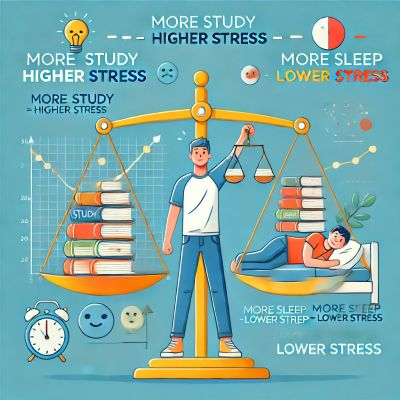

### **5.3 Practical Recommendations**
**For Students:**
*   **📚 Optimize Study Habits:** Plan a well-structured study schedule 🗓️ with regular breaks ⏸️ to reduce fatigue and enhance concentration 💡. This might involve using techniques like the Pomodoro method ⏱️, which alternates focused work periods with short breaks
*   **💤 Prioritize Sleep:** Ensure sufficient sleep 🛌 each night. Aim for 7-9 hours of sleep for optimal cognitive function 🧠 and stress reduction 😊. This can be achieved by establishing consistent sleep routines 🕒, creating a conducive sleep environment 🛋️, and avoiding electronic devices 📵 before bedtime
*   **🧘 Manage Stress:** Adopt effective stress-management strategies 💆, such as regular exercise 🏃, mindfulness 🧘, or other relaxation techniques 🌿. This could involve incorporating yoga 🧎, meditation 🙏, or deep-breathing exercises 😮‍💨 into your daily routine
*   **🤝 Seek Support:** Don't hesitate to seek support from university counseling services 🏢 or other resources if experiencing overwhelming stress 😰. These services can provide students with professional guidance 📖 and resources to cope with academic pressures and improve their mental well-being 🌈



**For Educational Institutions:**
*   **🌟 Promote Balanced Lifestyle:** Encourage a balanced lifestyle among students through workshops 🎤 or awareness campaigns 📣. This could involve organizing events on time management ⏳, stress reduction 😊, healthy sleep habits 🛌, and mindfulness techniques 🌿
*   **💆 Provide Stress-Reduction Resources:** Offer accessible stress-reduction resources 🧘 and support services for students. This might include on-campus counseling services 🏢, peer support groups 🤝, or relaxation facilities 🌺 where students can unwind and practice relaxation techniques
*   **📅 Flexible Curriculum:** Design curricula and assessment schedules that allow for manageable workloads 📖 and adequate study time ⏰. This could involve considering the distribution of exams 📝, assignments 📂, and project deadlines 🗓️ throughout the semester to avoid overwhelming students with excessive academic demands 😓

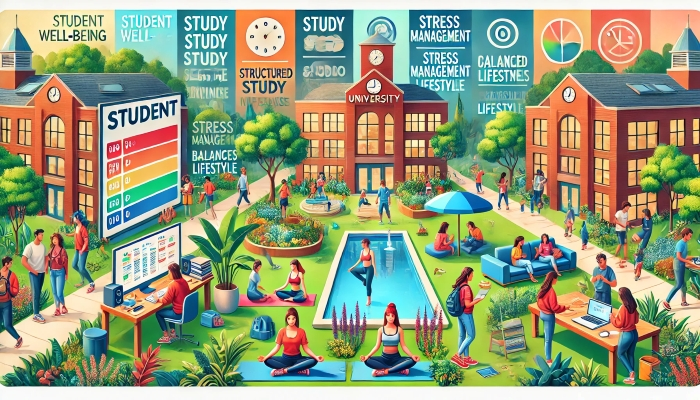